# Prosjektoppgave med innlevering 11.april 2025

#### Jeg har valgt å arbeide med den ferdigdefinerte oppgaven gitt av faglærerne 





Del a)
Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1
i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i
kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’. 

In [181]:
import pandas as pd

# Laster inn data fra CSV-filen med semikolon som delimiter
data = pd.read_csv("support_uke_24.csv", delimiter=';', skiprows=1, names=["Ukedag", "  Kl_slett", "    Varighet", "  Score"])

# Erstatter NaN-verdier med tomme strenger
data = data.fillna('')

# Skriver ut dataene uten indeks
print(data.to_string(index=False))



 Ukedag   Kl_slett     Varighet   Score
 Mandag   08:04:16     00:07:12        
 Mandag   08:04:53     00:02:49     6.0
 Mandag   08:06:31     00:08:36        
 Mandag   08:11:21     00:04:34        
 Mandag   08:20:46     00:07:38        
 Mandag   08:22:03     00:02:56     8.0
 Mandag   08:22:14     00:09:46        
 Mandag   08:23:12     00:06:47        
 Mandag   08:25:16     00:05:45    10.0
 Mandag   08:35:58     00:11:17        
 Mandag   08:46:32     00:07:39        
 Mandag   08:49:46     00:03:27        
 Mandag   08:52:53     00:10:21        
 Mandag   08:58:06     00:10:35        
 Mandag   09:07:43     00:10:59        
 Mandag   09:11:23     00:06:43        
 Mandag   09:21:07     00:06:57     8.0
 Mandag   09:28:51     00:10:09        
 Mandag   09:33:10     00:07:08        
 Mandag   09:37:00     00:10:43        
 Mandag   09:49:43     00:01:57        
 Mandag   09:51:18     00:05:45        
 Mandag   10:04:05     00:04:01        
 Mandag   10:07:20     00:06:57     9.0


Del b) Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
visualiseres ved bruk av et søylediagram (stolpediagram)

In [141]:
import pandas as pd

# Laster inn data fra CSV-filen med semikolon som delimiter
data = pd.read_csv("support_uke_24.csv", delimiter=';', skiprows=1, names=["Ukedag", "Kl_slett", "Varighet", "Score"])

# Erstatter NaN-verdier med tomme strenger og deretter med "0"
data = data.fillna("").replace("", "0")

# Fjerner eventuelle mellomrom
data["Ukedag"] = data["Ukedag"].str.strip().str.lower()  # Sikrer små bokstaver for sammenlignbarhet

# Definerer riktig rekkefølge for ukedagene
ukedager_rekkefølge = ["mandag", "tirsdag", "onsdag", "torsdag", "fredag"]

# Gjør 'Ukedag' til en kategorisk kolonne med ønsket rekkefølge
data["Ukedag"] = pd.Categorical(data["Ukedag"], categories=ukedager_rekkefølge, ordered=True)

# Grupperer og teller antall samtaler
antall_samtaler_per_dag = data.groupby("Ukedag").size().sort_index()

# Skriver ut antall samtaler per dag i riktig rekkefølge
for dag, antall in antall_samtaler_per_dag.items():
    print(f"Antall samtaler på {dag}: {antall}")


Antall samtaler på mandag: 51
Antall samtaler på tirsdag: 44
Antall samtaler på onsdag: 45
Antall samtaler på torsdag: 35
Antall samtaler på fredag: 42


Antall samtaler på mandag: 51
Antall samtaler på tirsdag: 44
Antall samtaler på onsdag: 45
Antall samtaler på torsdag: 35
Antall samtaler på fredag: 42


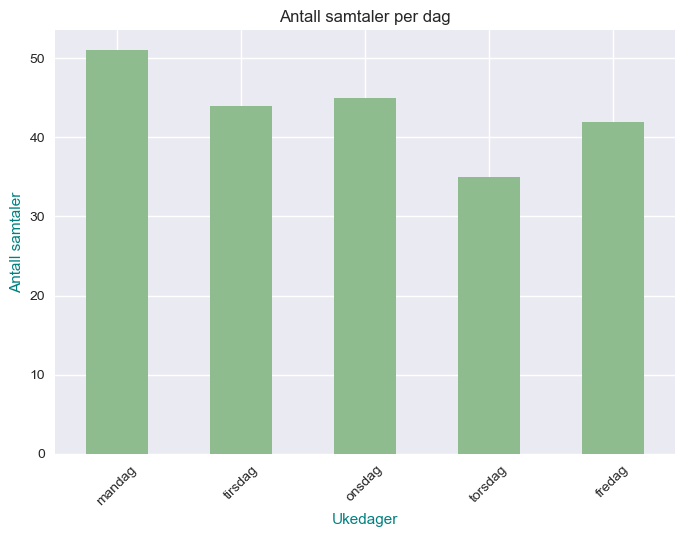

In [142]:
import pandas as pd

# Laster inn data fra CSV-filen med semikolon som delimiter
data = pd.read_csv("support_uke_24.csv", delimiter=';', skiprows=1, names=["Ukedag", "Kl_slett", "Varighet", "Score"])

# Erstatter NaN-verdier med tomme strenger og deretter med "0"
data = data.fillna("").replace("", "0")

# Fjerner eventuelle mellomrom
data["Ukedag"] = data["Ukedag"].str.strip().str.lower()  # Sikrer små bokstaver for sammenlignbarhet

# Definerer riktig rekkefølge for ukedagene
ukedager_rekkefølge = ["mandag", "tirsdag", "onsdag", "torsdag", "fredag"]

# Gjør 'Ukedag' til en kategorisk kolonne med ønsket rekkefølge
data["Ukedag"] = pd.Categorical(data["Ukedag"], categories=ukedager_rekkefølge, ordered=True)

# Grupperer og teller antall samtaler
antall_samtaler_per_dag = data.groupby("Ukedag").size().sort_index()

# Skriver ut antall samtaler per dag i riktig rekkefølge
for dag, antall in antall_samtaler_per_dag.items():
    print(f"Antall samtaler på {dag}: {antall}")


#Plotter antall samtaler per dag:
antall_samtaler_per_dag.plot(kind="bar", color="darkseagreen")

plt.xlabel("Ukedager", color="teal")
plt.ylabel("Antall samtaler", color="teal")
plt.title("Antall samtaler per dag")
plt.xticks(rotation=45)
plt.show()

Del c) Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
Svaret skrives til skjerm med informativ tekst

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å konvertere tid fra "hh:mm:ss" til minutter
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(":"))
    return h * 60 + m + s / 60

# Laster inn data fra CSV-filen med semikolon som delimiter
data = pd.read_csv("support_uke_24.csv", delimiter=';', skiprows=1, names=["Ukedag", "Kl_slett", "Varighet", "Score"])

# Erstatter NaN-verdier og tomme strenger med 0
data = data.fillna("").replace("", "0")

# Ekstraherer kolonnene som numpy arrays
Ukedag = data["Ukedag"].values
Kl_slett = data["Kl_slett"].values
Varighet = data["Varighet"].apply(time_to_minutes).values  # Konverterer til minutter og deretter til numpy array
Score = data["Score"].astype(float).values  # Konverterer til float og deretter til numpy array

# Beregner gjennomsnittlig samtaletid
Lengste_samtale = np.max(Varighet)
Korteste_samtale = np.min(Varighet)
Sum_samtaler = np.sum(Varighet)

print(f"Summen av alle samtaler er: {Sum_samtaler/60:.2f} timer")
print(f" Den korteste samtalen var på:  {Korteste_samtale:.2f} minutter")
print(f" Den lengste samtalen var på:  {Lengste_samtale:.2f} minutter")

Del d) Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
henvendelser i uke 24

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å konvertere tid fra "hh:mm:ss" til minutter
def time_to_minutes(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 60 + m + s / 60

# Laster inn data fra CSV-filen med semikolon som delimiter
data = pd.read_csv("support_uke_24.csv", delimiter=';', skiprows=1, names=["Ukedag", "Kl_slett", "Varighet", "Score"])

# Erstatter NaN-verdier og tomme strenger med 0
data = data.fillna("").replace("", "0")

# Ekstraherer kolonnene som numpy arrays
Ukedag = data["Ukedag"].values
Kl_slett = data["Kl_slett"].values
Varighet = data["Varighet"].apply(time_to_minutes).values  # Konverterer til minutter og deretter til numpy array
Score = data["Score"].astype(float).values  # Konverterer til float og deretter til numpy array

# Beregner gjennomsnittlig samtaletid
Gj_samtale_tid = np.mean(Varighet)
print(f"Gjennomsnittlig samtaletid er: {Gj_samtale_tid:.2f} minutter")




Gjennomsnittlig samtaletid er: 6.67 minutter


Del e) Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
bruk av et sektordiagram (kakediagram).



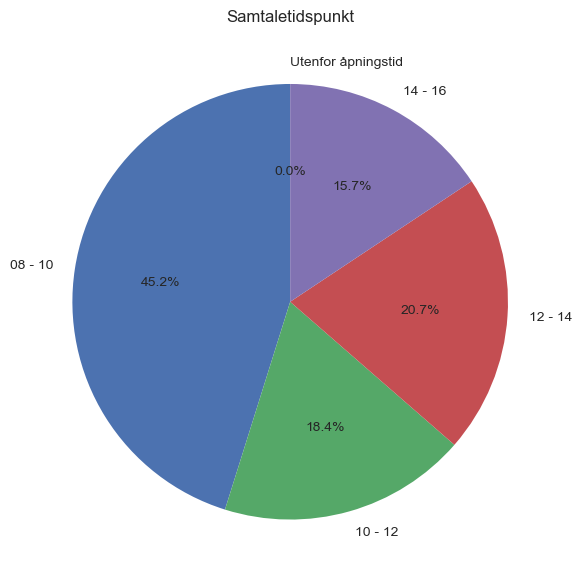

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

# Laster inn CSV-data
data = pd.read_csv("support_uke_24.csv", delimiter=';', skiprows=1, names=["Ukedag", "Kl_slett", "Varighet", "Score"])

# Fjerner NaN
data = data.fillna("")

# Stripper mellomrom
data["Kl_slett"] = data["Kl_slett"].str.strip()

# Trekker ut klokkeslett (forutsetter at det er HH:MM-format først i tekst)
data["Tid"] = data["Kl_slett"].str.extract(r"(\d{2}:\d{2})")

# Dropper rader uten gyldig tid
data = data.dropna(subset=["Tid"])

# Konverterer til klokkeslett
data["Tid"] = pd.to_datetime(data["Tid"], format="%H:%M").dt.time

# Kategoriserer tiden i grupper:
def kategoriser_tid(tid):
    if tid >= pd.to_datetime("08:00", format="%H:%M").time() and tid < pd.to_datetime("10:00", format="%H:%M").time():
        return "08 - 10"
    elif tid >= pd.to_datetime("10:00", format="%H:%M").time() and tid < pd.to_datetime("12:00", format="%H:%M").time():
        return "10 - 12"
    elif tid >= pd.to_datetime("12:00", format="%H:%M").time() and tid < pd.to_datetime("14:00", format="%H:%M").time():
        return "12 - 14"
    elif tid >= pd.to_datetime("14:00", format="%H:%M").time() and tid < pd.to_datetime("16:00", format="%H:%M").time(): 
        return "14 - 16"
    else:
        return "Utenfor åpningstid"

# Legger til kategorier
data["Tid_kategori"] = data["Tid"].apply(kategoriser_tid)

# Sorterer rekkefølge
rekkefølge = ["08 - 10", "10 - 12", "12 - 14", "14 - 16", "Utenfor åpningstid"]
data["Tid_kategori"] = pd.Categorical(data["Tid_kategori"], categories=rekkefølge, ordered=True)

# Teller og plotter
teller = data["Tid_kategori"].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(teller, labels=teller.index, autopct="%1.1f%%", startangle=90)
plt.title("Samtaletidspunkt")
plt.tight_layout()
plt.show()


Del f)Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk:
Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.



Denne koden tar hensyn til at kun svar mellom 1 og 10 skal regnes med. Dermed vil den gi et mer nøyaktig NPS-resultat for supportavdelingen.

In [194]:
import pandas as pd

# Last inn data fra CSV-filen med semikolon som delimiter
data = pd.read_csv("support_uke_24.csv", delimiter=';', skiprows=1,
                   names=["Ukedag", "Kl_slett", "Varighet", "Score"])

# Rydd opp i "Score"-kolonnen: konverter til streng og fjern mellomrom
data["Score"] = data["Score"].astype(str).str.strip()

# Fjern rader der "Score" er tom eller lik "0"
data = data[(data["Score"] != "") & (data["Score"] != "0")]

# Konverter "Score" til flyttall for videre beregning
data["Score"] = data["Score"].astype(float)

# Beregn antall promotors (score 9-10) og detractors (score 1-6)
promotors = len(data[data["Score"] >= 9])
detractors = len(data[data["Score"] <= 6])
total_responses = len(data)

# Beregn NPS: prosentandel promotors minus prosentandel detractors
nps = ((promotors - detractors) / total_responses) * 100

print(f"Supportavdelingens NPS er: {nps:.2f}")


Supportavdelingens NPS er: 8.29
